In [1]:
import requests
import networkx
import time
import collections
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

Как получить токен?

- заходите в вк, нажимаете внизу "разработчикам"
- нажимаете "мои приложения" в верхнем меню 
- "создать приложние"
- выбираете standalone приложение, называете его как-нибудь, ждете смс
- снова заходите в вк, нажимаете внизу "разработчикам"
- нажимаете "мои приложения" в верхнем меню 
- находите свое приложение
- кликаете "редактировать"
- в левом меню "настройки"
- копируете "сервисный ключ доступа" - это и есть токен доступа

Как получить свой айди?
- заходите в вк
- настройки
- адрес страницы


Как получить версию?
- заходите в вк, нажимаете внизу "разработчикам"
- нажимаете "документация" в верхнем меню 
- выбираете в левом меню "версия api", берете верхнюю

Положите в config свой user_id, access_token, version

In [39]:
import json

def get_config(filename):
    with open(filename) as f:
        config = json.load(f)
    return config
        
        
config = get_config('config.json')
      
access_token = config['access_token']
version = config['version']
user_id = config['user_id']

Для выполнения вам потребутеся библиотека networkx. Изучите ее возможности

In [40]:
# функция возвращает список друзей
def get_friends_ids(user_id, version, access_token):
    friends_url = 'https://api.vk.com/method/friends.get?user_id={}&v={}&access_token={}' 
    json_response = requests.get(friends_url.format(user_id, version, access_token)).json()
    if json_response.get('error'):
        print(json_response.get('error'))
        return list()
    return json_response[u'response'][u'items']

In [41]:
graph = {}
# ваш user id, для которого вы хотите построить граф друзей.
friend_ids = get_friends_ids(user_id, version, access_token)  
for friend_id in friend_ids:
    graph[friend_id] = get_friends_ids(friend_id, version, access_token)

{'error_msg': 'Access denied: user deactivated', 'request_params': [{'value': '1', 'key': 'oauth'}, {'value': 'friends.get', 'key': 'method'}, {'value': '21286', 'key': 'user_id'}, {'value': '5.74', 'key': 'v'}], 'error_code': 15}
{'error_msg': 'Access denied: user deactivated', 'request_params': [{'value': '1', 'key': 'oauth'}, {'value': 'friends.get', 'key': 'method'}, {'value': '28242', 'key': 'user_id'}, {'value': '5.74', 'key': 'v'}], 'error_code': 15}
{'error_msg': 'Access denied: user deactivated', 'request_params': [{'value': '1', 'key': 'oauth'}, {'value': 'friends.get', 'key': 'method'}, {'value': '593832', 'key': 'user_id'}, {'value': '5.74', 'key': 'v'}], 'error_code': 15}
{'error_msg': 'Access denied: user deactivated', 'request_params': [{'value': '1', 'key': 'oauth'}, {'value': 'friends.get', 'key': 'method'}, {'value': '648029', 'key': 'user_id'}, {'value': '5.74', 'key': 'v'}], 'error_code': 15}
{'error_msg': 'Access denied: user deactivated', 'request_params': [{'valu

In [42]:
g = networkx.Graph(directed=False)

In [43]:
# соединяем друзей дружащих друг с другом
for i in graph:
    g.add_node(i)
    for j in graph[i]:
        if i != j and i in friend_ids and j in friend_ids:
            g.add_edge(i, j)

Сколько друзей получилось в графе?

In [44]:
print('число друзей:', len(g.nodes()))

число друзей: 350


In [45]:
# сохраняем
networkx.write_gml(g, 'network_friends.gml')

Можем считать при необходимости

In [46]:
g = nx.read_gml('network_friends.gml')

In [55]:
d = dict(nx.degree(g))
d.keys()

dict_keys(['10316254', '1679644', '2765133', '632055', '70352503', '7294851', '163830', '27263571', '440337', '46433419', '23493819', '1635811', '588375', '11259101', '712942', '1784719', '453532', '593832', '94024', '2104811', '13315596', '3474781', '178065595', '2074928', '24630', '30689722', '1053654', '38504', '3716958', '8409393', '490832', '29459826', '1514969', '2140447', '869118', '252920038', '1867755', '156537', '707046', '2798740', '1052858', '867513', '30819', '23686', '22186', '4538717', '92153820', '676481', '1958304', '22275', '28956', '128472', '1712588', '739575', '4537', '648029', '610419', '2243792', '117623413', '132336302', '665417', '11740592', '150472451', '12224982', '710500', '1620819', '167608', '2751207', '11601154', '95545022', '6223306', '2109047', '3118641', '37020871', '1711722', '14123596', '716252', '3409891', '58813', '4444198', '1303', '26906', '692300', '7221980', '32251789', '1288995', '170572', '1488846', '190197990', '11240861', '26962185', '92415

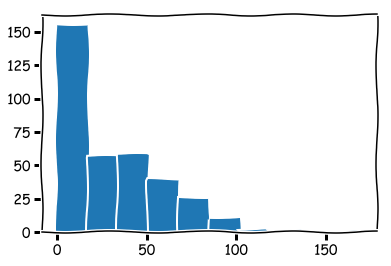

In [54]:
_ = plt.hist(list(d.values()))

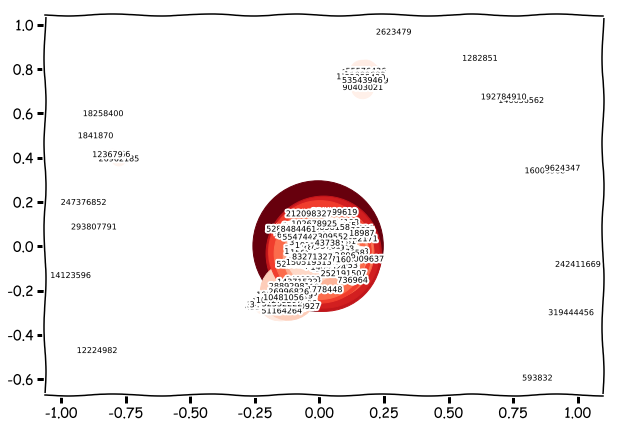

In [56]:
plt.xkcd()
k = dict(nx.degree(g))

plt.figure(1, figsize=(10,7))
coord = nx.spring_layout(g)
nx.draw_networkx(g,
                 pos=coord,
                 nodelist=list(k.keys()),
                 node_size = [d*100 for d in k.values()],
                 node_color=list(k.values()),
                 font_size=8,
                 cmap=plt.cm.Reds,
                 with_labels=True
                 )

In [57]:
def print_info_about(id_interest):  
    resp=requests.get('https://api.vk.com/method/users.get?user_ids={}&v={}&access_token={}'
                      .format(id_interest, version, access_token)).json()[u'response']
    print(resp[0][u'first_name'].strip()+' '+resp[0][u'last_name'].strip())

In [58]:
print_info_about('1679644')

Валентина Стулий


In [84]:
url  = u'https://api.vk.com/method/friends.get?user_id={}&fields=uids&access_token={}&v={}'\
    .format(user_id, access_token, version)
data  = requests.get(url).json()

d = {}
for el in data['response']['items']:
    d[el['id']] = '{} {}'.format(el['first_name'], el['last_name'])

In [86]:
d[94024]

'Татьяна Реутская'

Теперь в словарике лежит ключ (номер ноды), значение (имя фамилия)

Для применения метода спектральной кластеризации необходимо оставить одну  связную компоненту (самую большу/).
Почему? Что произойдет, если мы подадим несколько компонент связности?

(Для ответа на вопрос надо изучить, как работает алгоритм. Описание работы алгоритма есть, например, здесь https://arxiv.org/pdf/1307.7729.pdf)

Найдите число компонент связности в вашем графе

In [61]:
nx.number_connected_components(g)

18

Выделите самую большую компоненту каким-нибудь способом. Создайте новый граф с ней.

In [67]:
Gcc=sorted(nx.connected_component_subgraphs(g), key = len, reverse=True)
for i in range(len(Gcc)):
    print(len(Gcc[i].nodes()))
g_new = g.subgraph(list(nx.node_connected_component(g, list(Gcc[0].nodes())[0])))
nx.number_connected_components(g_new)

321
11
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1

In [68]:
nx.number_connected_components(g_new)

1

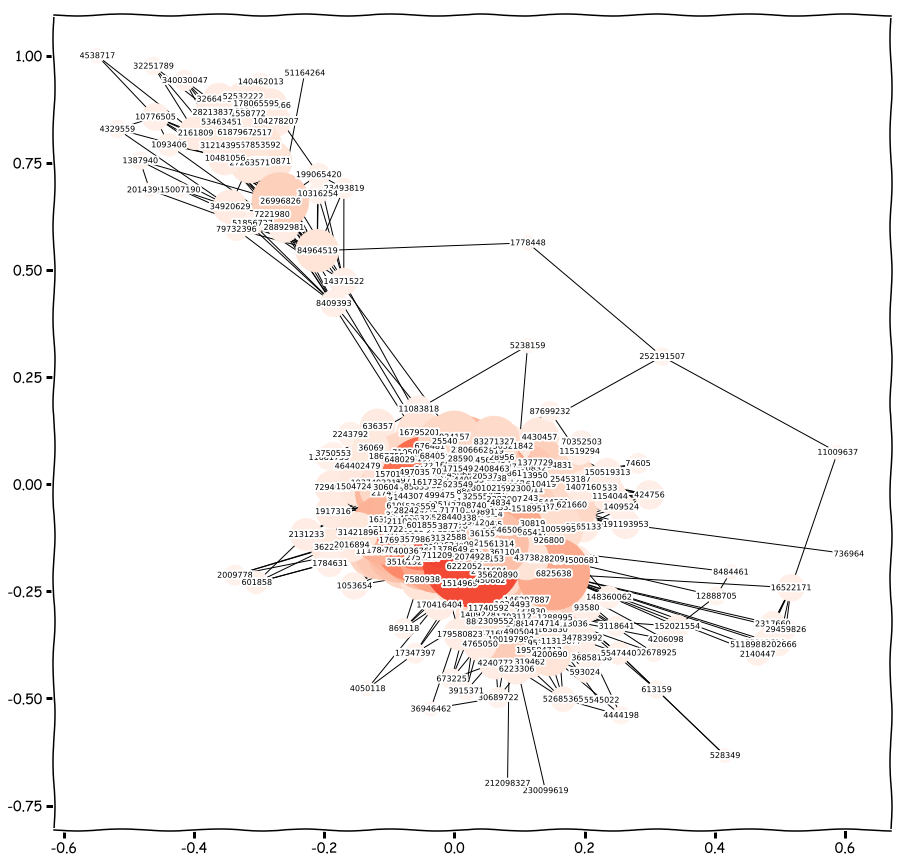

In [69]:

plt.xkcd()
k = dict(nx.degree(g_new))

plt.figure(1, figsize=(15,15))
coord = nx.spring_layout(g_new)
nx.draw_networkx(g_new,
                 pos=coord,
                 nodelist=k.keys(),
                 node_size = [d*100 for d in list(k.values())],
                 node_color=list(k.values()),
                 font_size=8,
                 cmap=plt.cm.Reds, # plt.get_cmap('viridis')
                 #with_labels=True
                 )

Теперь 
- создадим матрицу смежности
- воспользуемся модель spectral_clustering http://scikit-learn.org/stable/modules/generated/sklearn.cluster.spectral_clustering.html#sklearn.cluster.spectral_clustering

In [70]:
matr = nx.adjacency_matrix(g_new, nodelist=g_new.nodes())

In [71]:
from sklearn.cluster import SpectralClustering, spectral_clustering
sc = spectral_clustering(matr, n_clusters=12)
colorlist = sc+ 1

In [72]:
from collections import Counter
Counter(colorlist)

Counter({1: 6,
         2: 8,
         3: 35,
         4: 61,
         5: 25,
         6: 21,
         7: 1,
         8: 112,
         9: 14,
         10: 8,
         11: 25,
         12: 5})

In [88]:
import numpy as np
import html
for key in np.array(g_new.nodes())[colorlist==4]:
    print(d[int(key)])

Татьяна Реутская
Тимур Курманов
Анастасия Кулагина
Максим Лаврухин
Ирина Конопацкая
Мария Быкова
Костя Сингуров
Оля Шутова
Рустам Баекенов
DELETED 
Яна Петрова
Павел Поздняков
Антон Шабалин
Артём Волосатов
Алексей Уткин
Максим Быков
Алексей Кукотин
DELETED 
Евгений Пономарев
Родик Мочаловскиi
Игорь Чемеркин
Ксения Кулигина
Николай Семёнов
Михаил Громов
Дмитрий Островский
Виктория Худякова
Мария Ковалёва
Наталья Анисимова
Светланка Радохлеб
Танюта Гардюсик
Александра Пыряева
Даба Раднатаров
Александр Бакланов
Юлия Демидова
Николай Усольцев
Ксения Андрейчикова
Ксения Русакова
Екатерина Ефимова
Константин Варжавин
Alexandra Korn
Руслан Пластинин
Мария Неклюдова
Екатерина Василькова
Даша Трубицына
Ирина Проворная
Диман Луппов
Ирина Беленькая
Нина Новак
Натти Петрыкина
Марина Марьина
Митя Чурин
Дмитрий Ушаков
Антон Кожухов
Михаил Вагин
Дмитрий Куринский
Яков Гайфулин
Андрей Ярушкин
Александра Молчанова
Всеволод Чебыкин
Максим Путилов
Руслан Бец


In [90]:
for key in np.array(g_new.nodes())[colorlist==8]:
    print(d[int(key)])

Никита Дамбаев
Любовь Соловьева
Валентина Стулий
Михаил Целищев
Анюта Антонченко
Мария Мокшанцева
Светлана Горобцова
Илья Стафеев
Margarita Abramyan
J.D. xxx
Олег Годовых
Мария Прасолова
Илья Турукин
Дмитрий Талочкин
Ирина Фёдорова
Алексей Киселев
Анечка Лорина
Андрей Мирошниченко
Виктория Тузова
Елена Старцева
Евгений Шорохов
Сергей Осипов
Андрей Сараев
Ирина Нишакова
Катька Третьякова
Михаил Белкин
Илья Кожемякин
Елизавета Гальт
Тёма Проводин
Юля Шакурова
Максим Борисов
Юлёк Тучкова
Роман Билимович
Кирилл Михайлов
Михаил Борисов
Александра Каприелова
Малышка Мю
Владимир Тимонов
Александр Рогачев
Дарима Доржиева
Юлия Исмагилова
Вадим Кулаев
Дмитрий Ким
Дарья Пшеничникова
Сергей Бойко
Елена Битюкова
Данил Мажукин
Any Platonova
Ольга Брагина
Иван Смоляков
DELETED 
Андрей Кузнецов
Анастасия Орлова
Анна Коломийченко
Станислав Березнюк
DELETED 
Александр Горячкин
Анастасия Стулий
Алексей Шпурненко
Елена Шмакова
Юлия Лаптева
Kristina Yevstifeyeva
Denis Bragin
Николай Калюжный
Никита Ше
Арту

In [91]:
for key in np.array(g_new.nodes())[colorlist==7]:
    print(d[int(key)])

Ваня Симоненко


In [92]:
for key in np.array(g_new.nodes())[colorlist==9]:
    print(d[int(key)])

Ольга Балашова
Вадим Шаламов
Ксения Васильева
Владислав Иванов
Алекс Проценко
Роман Билимович
Андрей Балашов
Ирина Григорьева
Евгения Легкова
Валерия Шах
Татьяна Бузлукова
Евгения Гурьянова
Алексей Проценко
Михаил Нуждин


In [93]:
for key in np.array(g_new.nodes())[colorlist==5]:
    print(d[int(key)])

Дмитрий Дрижак
Константин Оконечников
Татьяна Козлова
Михаил Кандрушин
Надежда Красовская
Дмитрий Батомункуев
Анастасия Зеленина
Юля Найдёнова
Андрей Лохов
Сергей Ти
Александр Киров
Александр Сенченко
Виктория Звода
Елена Федотова
Николай Куртов
Сергей Хрипунов
Андрей Семенов
Анна Ягодницына
Роман Головин
Михаил Гарифуллин
Андрей Кузьмин
Аркадий Дробчик
Евгений Булушев
Иван Чалов
Юлия Альгаер


In [94]:
for key in np.array(g_new.nodes())[colorlist==6]:
    print(d[int(key)])

Анастасия Габова
Тимур Гринёв
Гоги Федянин
Максим Логвиненко
Анютка Мирошниченко
Женя Юрьева
Анна Литвиненко
Кирилл Коновалов
Софья Котлер
Наташа Толкачева
Катерина Черных
Игорь Ерилов
Valeriy Hlam
Павел Краснов
Dima Goncharov
Паша Котлер
Кирилл Серегин
Аня Лысенкова
Artem Lysenkov
Анна Черкашина
Анна Попова


In [95]:
for key in np.array(g_new.nodes())[colorlist==3]:
    print(d[int(key)])

Роман Захаров
Антон Головков
Александр Алексеенко
Николай Молчанов
Amgalan Batomunkuev
Николай Седельников
Александр Тройнин
Данил Сахабутдинов
Алина Самохина
Евгений _И_
Алексей Жуков
Алексей Чернов
Михаил Зиновьев
София Краснухина
Владимир Лихтанский
Пётр Кропотин
Алексей Каргаполов
Дарья Карчевская
Роман Морозов
Илья Глухов
Антон Головков
Павел Гривин
Александр Лагун
Леонид Климов
Ксения Ковалёва
Владимир Курдюков
Евгения Логутенко
Кристина Дружина
Никита Колчанов
Евгения Русалеева
Егор Гильд
Ольга Кускова
Екатерина Качайло
Анна Камкина
Бронислав Числов


In [96]:
for key in np.array(g_new.nodes())[colorlist==2]:
    print(d[int(key)])

Ксения Колесникова
Artem Numalov
Елена Ленина
Кристина Орлова
Егор Егорычев
Маришка Алексеева
Александр Кочуров
Евгений Платонов


In [97]:
for key in np.array(g_new.nodes())[colorlist==1]:
    print(d[int(key)])

Роман Суворов
Маргарита Ананьева
Ольга Капитонова
Александр Швец
Семён Смирнов
Дарья Швец


In [59]:
for key in np.array(g_new.nodes())[colorlist==10]:
    print d[key]

Катюша Насонкина
DELETED 
Юля Бровкина
Миша Шарков
Владимир Стажёров
Савва Гершт
Константин Кожевников
Мура Якерсон
Александр Перетятько
Наталия Цуринова
Тёма Голь
Анна Желонкина
Евгений Мельников
Ярослав Маков
Василий Доммес
Артемий Жирняков
Андрей Гончаров
Александр Карпеков
Дмитрий Паничев
Лена Волжина
Екатерина Константинова
Михаил Евтихиев
Yana Blokhtina
Юлия Пашковская
Ольга Гроссман
Юля Садовникова
Лидия Чернякова
Женя Елисеева
Моника Хитцман
Елизавета Подгорная
Екатерина Базанова
Ирина Борисова
Анна Бочарова
Иннокентий Шувалов
Георгий Савельев
Вера Гефтер
Любовь Москвина
Αртем Πономарев
Яна Теплицкая
Катя Никифорова
Кузьма Смирнов
Елизавета Малинина
Ольга Туранова
Мария Панченко
Наталия Курнант
Вася Буций
Сережа Голубев
Татьяна Мартынова
Лиза Корнеева
Константин Петрухно
Виталий Пинчук
Константин Корешков
DELETED 
